In [1]:
# import packages yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inisialisasi hyperparameter
w = 0.5
c1 = 0.7
c2 = 0.7
n_agent = 10
max_iter = 20
# upper bound dan lower bound
ub = 10
lb = -10

In [3]:
# definisikan fungsi yang dioptimasi
def function(x):
#     return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    return -(np.cos(x[0]) * np.cos(x[1]) * np.exp(-1 * ((x[0] - np.pi)**2 + (x[1] - np.pi)**2)))

In [4]:
# definisikan fungsi fitness
def fitness(x):
    return 2 ** -x

In [5]:
# definisikan fungsi velocity
def velocity(w, v0, c1, c2, personal_best, global_best, agent_pos):
    individual_cognition = c1 * np.random.random() * (personal_best - agent_pos)
    social_cognition = c2 * np.random.random() * (global_best - agent_pos)
    return (w * v0) + individual_cognition + social_cognition

In [6]:
# inisialisasi sebanyak n agent
# setiap agent punya key posisi dan fitness
dimension = 2 # karena ruang pencarian kita hanya 2 dimensi (x dan y)
positions = np.random.uniform(lb,ub,size=[n_agent,dimension])

agents = []
for pos in positions:
    agents.append({'pos': pos})

for agent in agents:
    agent['fit'] = fitness(function(agent['pos']))

In [7]:
agents

[{'pos': array([8.09019907, 4.21666265]), 'fit': 1.0000000000005624},
 {'pos': array([-9.42885341,  4.58905923]), 'fit': 1.0},
 {'pos': array([ 8.74277812, -9.02129801]), 'fit': 1.0},
 {'pos': array([-3.36679025,  2.47480039]), 'fit': 1.0},
 {'pos': array([4.55370225, 3.99811114]), 'fit': 1.004701479010483},
 {'pos': array([-0.5016791 ,  2.92270081]), 'fit': 0.999999027611174},
 {'pos': array([ 4.17067066, -5.28912827]), 'fit': 1.0},
 {'pos': array([-3.92312994,  4.60738039]), 'fit': 1.0},
 {'pos': array([ 9.72890958, -2.13246669]), 'fit': 1.0},
 {'pos': array([-0.66199703, -9.88520349]), 'fit': 1.0}]

In [8]:
# definisikan index personal_best dan index global_best
personal_best = max(agents, key=lambda x:x['fit'])['pos']
global_best = personal_best

iteration: 0, pbest: [4.55370225 3.99811114], gbest:[4.55370225 3.99811114]


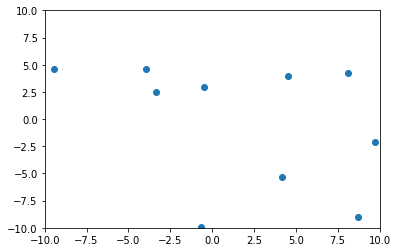

iteration: 1, pbest: [3.7934413  3.85189375], gbest:[3.7934413  3.85189375]


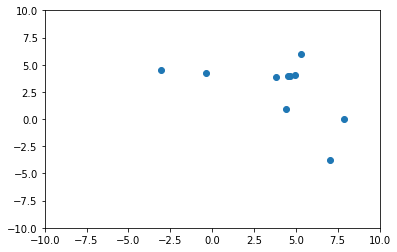

iteration: 2, pbest: [2.5534851 3.8284086], gbest:[2.5534851 3.8284086]


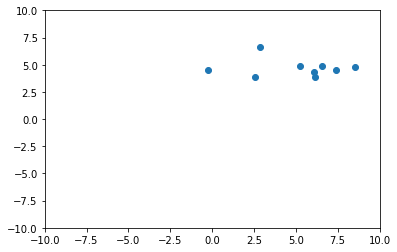

iteration: 3, pbest: [2.66043914 3.82557041], gbest:[2.66043914 3.82557041]


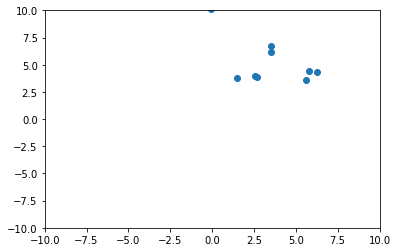

iteration: 4, pbest: [2.86704059 3.95834923], gbest:[2.86704059 3.95834923]


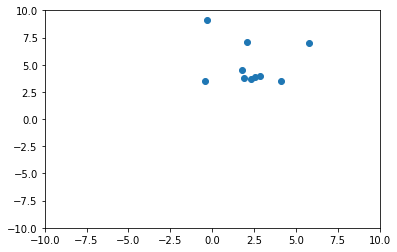

iteration: 5, pbest: [3.47632782 3.43189875], gbest:[3.47632782 3.43189875]


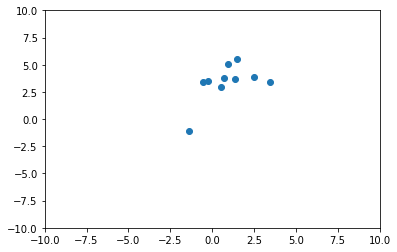

iteration: 6, pbest: [3.15263357 3.40698243], gbest:[3.15263357 3.40698243]


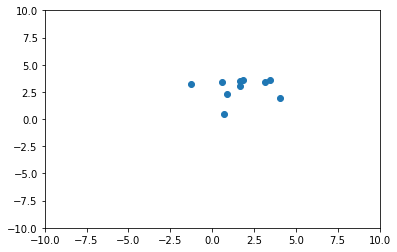

iteration: 7, pbest: [3.34880651 3.30414648], gbest:[3.34880651 3.30414648]


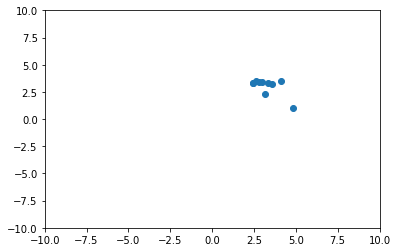

iteration: 8, pbest: [3.21862258 3.34878492], gbest:[3.21862258 3.34878492]


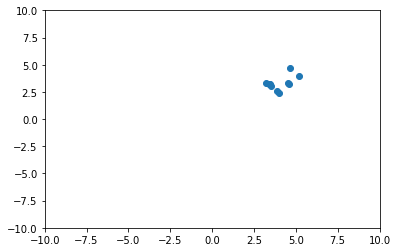

iteration: 9, pbest: [3.39322812 3.08586837], gbest:[3.39322812 3.08586837]


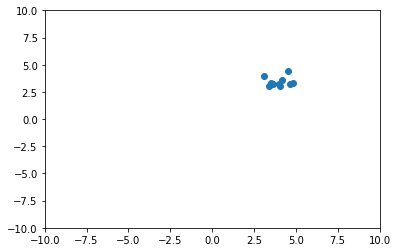

iteration: 10, pbest: [3.02634225 3.01093262], gbest:[3.02634225 3.01093262]


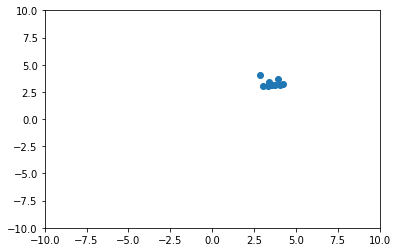

iteration: 11, pbest: [3.17052712 3.03599057], gbest:[3.17052712 3.03599057]


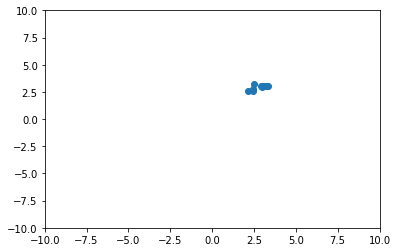

iteration: 12, pbest: [3.03729026 3.00695416], gbest:[3.03729026 3.00695416]


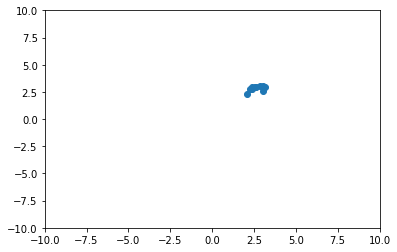

iteration: 13, pbest: [3.11413806 3.08319427], gbest:[3.11413806 3.08319427]


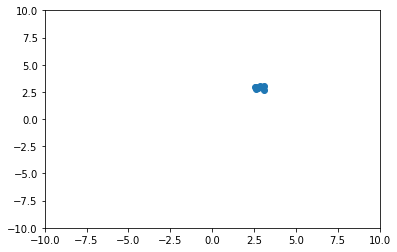

iteration: 14, pbest: [3.13802902 3.09146603], gbest:[3.13802902 3.09146603]


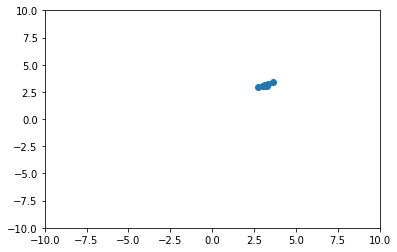

iteration: 15, pbest: [3.14164666 3.15228714], gbest:[3.14164666 3.15228714]


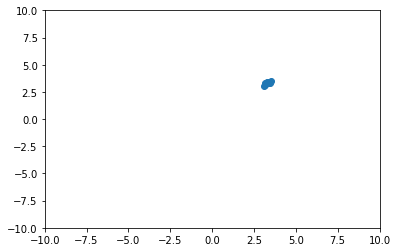

iteration: 16, pbest: [3.15542679 3.13979036], gbest:[3.15542679 3.13979036]


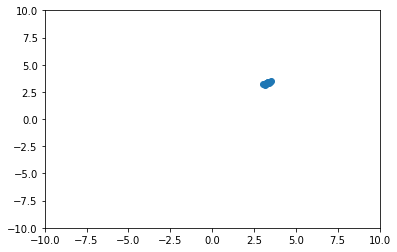

iteration: 17, pbest: [3.16322987 3.17774839], gbest:[3.16322987 3.17774839]


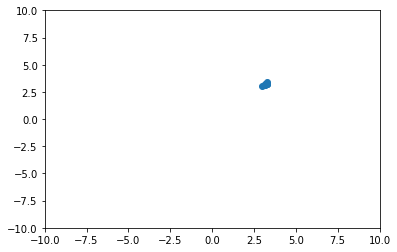

iteration: 18, pbest: [3.14085802 3.16399733], gbest:[3.14085802 3.16399733]


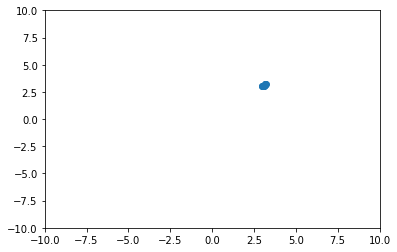

iteration: 19, pbest: [3.1246628  3.12846345], gbest:[3.1246628  3.12846345]


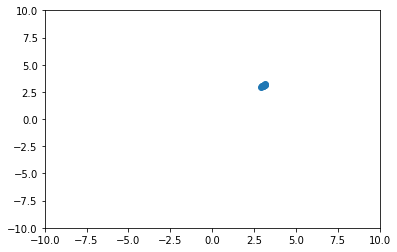

In [9]:
# perulangan sampai max_iter
v = np.zeros((n_agent,dimension))
for i in range(max_iter):
    # visualisasikan
    print(f'iteration: {i}, pbest: {personal_best}, gbest:{global_best}')
    pos_history_x = [x['pos'][0] for x in agents]
    pos_history_y = [x['pos'][1] for x in agents]
    plt.scatter(pos_history_x, pos_history_y)
    plt.xlim(lb, ub)
    plt.ylim(lb, ub)
    plt.show()
    
    # untuk setiap agent
    for k in range(n_agent):
        # hitung velocity agent
        agent_pos = agents[k]['pos']
        v[k] = velocity(w, v[k], c1, c2, personal_best, global_best, agent_pos)
        # perbarui posisi agent
        agents[k]['pos'] += v[k]
    
    # untuk semua agent
    for agent in agents:
        # hitung nilai fitness agent
        agent['fit'] = fitness(function(agent['pos']))
        
    # pilih partikel dengan fitness terbaik, simpan
    personal_best = max(agents, key=lambda x:x['fit'])['pos']
    if fitness(function(personal_best)) > fitness(function(global_best)):
        global_best = personal_best